<a href="https://colab.research.google.com/github/ai-dolaeva/microsoft/blob/main/PE_microsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()  #для загрузки библиотек

Saving Microsoft_data.csv to Microsoft_data.csv


{'Microsoft_data.csv': b'1678000000000,26.42,0.5353,19.9,0.5197,0.1,99.06705,101.4151,1.719510101726287,19.9,106.2,15.85,35.81,33.15,31,12,2020,31-12-2020\r\n1676000000000,26.42,0.5353,21.11,0.5075,0.12,99.06705,101.4151,1.981133791384932,21.11,104.85,16.36,36.21,35.81,30,12,2020,30-12-2020\r\n1695000000000,26.42,0.5353,21.11,0.5075,0.11,99.06705,101.4151,1.981133791384932,21.11,104.85,15.98,36.34,36.21,29,12,2020,29-12-2020\r\n1701000000000,26.42,0.5353,21.11,0.5075,0.11,99.06705,101.4151,1.981133791384932,21.11,104.85,15.94,35.99,36.34,28,12,2020,28-12-2020\r\n1684000000000,26.42,0.5353,21.11,0.5075,0.1,99.06705,101.4151,1.981133791384932,21.11,104.85,15.86,35.71,35.99,24,12,2020,24-12-2020\r\n1671000000000,26.42,0.5353,21.11,0.5075,0.09,99.06705,101.4151,1.6515166496797846,21.11,104.85,17.36,36.18,35.71,23,12,2020,23-12-2020\r\n1693000000000,26.42,0.5353,21.11,0.5075,0.09,99.06705,101.4151,1.6515166496797846,21.11,104.85,19.77,35.96,36.18,22,12,2020,22-12-2020\r\n1683000000000,26.42

PE - Price/Earnings (для microsoft)
MC - Market Capitalization (или Size) (для microsoft)
SGR - Sustainable Growth Rate (Annual) Data (%) (для microsoft) (или Earnings growth)
FL - Financial Leverage (Annual) (для microsoft)
DPR - Dividends Payout Ratio (TTM) (или Payout Ratio) (для microsoft)
TR - Turnover Ratio (или Asset Utilization (TTM))
IR - Interest rate (1 Year Treasury Rate (%)) (общий)
CCI - Consumer confidence index  (University of Michigan Consumer Sentiment Index) (общий)
BCI - Business confidence index  (National Bank?) (общий)
AII - American Association of Individual Investors (общий) (Bull / Bear Ratio)
DTA - Debt to Assets (Quarterly) (%) (для microsoft)
USIPI - US Industrial Production Index (общий)
MV - 30-Day Rolling Volatility (%) (для microsoft)

['MC','SGR','FL','DPR','TR', 'IR', 'CCI', 'BCI', 'AII', 'DTA', 'USIPI', 'MV', 'PEpred', 'PE', 'day','month','year', 'date']

In [3]:
import pandas as pd
import numpy as np
import csv
import math

In [18]:
data_microsoft = 'Microsoft_data.csv'
df= pd.read_csv(data_microsoft, header=None, names = ['MC','SGR','FL','DPR','TR', 'IR', 'CCI', 'BCI', 'AII', 'DTA', 'USIPI', 'MV', 'PEpred', 'PE', 'day','month','year', 'date'])

In [5]:
df

,MC,SGR,FL,DPR,TR,IR,CCI,BCI,AII,DTA,USIPI,MV,PEpred,PE,day,month,year,date
0,1678000000000,26.42,0.5353,19.90,0.5197,0.10,99.06705,101.41510,1.719510,19.90,106.20,15.85,35.81,33.15,31,12,2020,31-12-2020
1,1676000000000,26.42,0.5353,21.11,0.5075,0.12,99.06705,101.41510,1.981134,21.11,104.85,16.36,36.21,35.81,30,12,2020,30-12-2020
2,1695000000000,26.42,0.5353,21.11,0.5075,0.11,99.06705,101.41510,1.981134,21.11,104.85,15.98,36.34,36.21,29,12,2020,29-12-2020
3,1701000000000,26.42,0.5353,21.11,0.5075,0.11,99.06705,101.41510,1.981134,21.11,104.85,15.94,35.99,36.34,28,12,2020,28-12-2020
4,1684000000000,26.42,0.5353,21.11,0.5075,0.10,99.06705,101.41510,1.981134,21.11,104.85,15.86,35.71,35.99,24,12,2020,24-12-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7683,8320000000,37.72,0.0071,0.59,1.2940,8.14,99.72487,98.62141,0.736842,0.59,62.64,31.61,25.09,25.43,6,7,1990,06-07-1990
7684,8207000000,37.72,0.0071,0.59,1.2940,8.02,99.72487,98.62141,0.815789,0.59,62.64,36.19,25.00,25.09,5,7,1990,05-07-1990
7685,8178000000,37.72,0.0071,0.59,1.2940,8.01,99.72487,98.62141,0.815789,0.59,62.64,36.52,25.61,25.00,3,7,1990,03-07-1990
7686,8377000000,37.72,0.0071,0.59,1.2940,8.06,99.72487,98.62141,0.815789,0.59,62.64,36.62,26.39,25.61,2,7,1990,02-07-1990


In [25]:
df.drop(['day','month', 'year', 'date'], axis='columns', inplace=True)

In [7]:
df.describe()

,MC,SGR,FL,DPR,TR,IR,CCI,BCI,AII,DTA,USIPI,MV,PEpred,PE
count,7.688000e+03,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000
mean,3.232298e+11,23.356165,0.178950,7.416363,0.727397,2.869331,100.068510,99.833782,1.470326,7.416363,89.593903,29.118479,30.709998,30.710878
std,3.016198e+11,15.836737,0.290903,10.954018,0.273878,2.246192,1.586475,1.135912,0.886091,10.954018,13.946765,13.632075,14.542601,14.542544
min,1.018000e+09,-38.810000,0.000000,0.000000,0.421400,0.080000,96.262330,95.598430,0.194030,0.000000,60.210000,6.610000,8.058000,8.058000
25%,1.672400e+11,15.740000,0.000000,0.000000,0.482500,0.510000,98.913840,99.240560,0.878262,0.000000,83.730000,19.347500,19.580000,19.580000
50%,2.733100e+11,27.340000,0.000000,0.000000,0.649400,2.440000,100.424400,99.911270,1.267815,0.000000,91.910000,26.765000,28.220000,28.225000
75%,3.702300e+11,35.070000,0.208800,11.190000,0.906700,5.030000,101.138800,100.581800,1.790826,11.190000,100.300000,35.810000,37.760000,37.760000
max,1.753000e+12,41.170000,0.982700,37.830000,1.354000,8.210000,103.060300,102.223700,8.334889,37.830000,110.550000,99.750000,79.490000,79.490000


In [8]:
df.corr()

,MC,SGR,FL,DPR,TR,IR,CCI,BCI,AII,DTA,USIPI,MV,PEpred,PE
MC,1.000000,-0.211741,0.659235,0.651975,-0.610713,-0.383905,0.187634,0.161515,-0.067169,0.651975,0.666952,-0.068055,0.157525,0.157857
SGR,-0.211741,1.000000,-0.251257,-0.241264,0.643707,0.312225,-0.159840,-0.252272,-0.037733,-0.241264,-0.484508,0.321892,0.053499,0.053689
FL,0.659235,-0.251257,1.000000,0.982804,-0.463142,-0.488260,0.136042,0.223955,-0.190079,0.982804,0.608532,-0.259985,-0.051513,-0.051415
DPR,0.651975,-0.241264,0.982804,1.000000,-0.466554,-0.562104,0.071956,0.227289,-0.194485,1.000000,0.631986,-0.279299,-0.131974,-0.131591
TR,-0.610713,0.643707,-0.463142,-0.466554,1.000000,0.517600,-0.301564,-0.272300,-0.089889,-0.466554,-0.853370,0.193097,-0.098287,-0.097833
IR,-0.383905,0.312225,-0.488260,-0.562104,0.517600,1.000000,0.420115,-0.164532,0.168208,-0.562104,-0.610859,0.255749,0.465883,0.465620
CCI,0.187634,-0.159840,0.136042,0.071956,-0.301564,0.420115,1.000000,0.314596,0.342006,0.071956,0.115317,-0.028353,0.735990,0.735604
BCI,0.161515,-0.252272,0.223955,0.227289,-0.272300,-0.164532,0.314596,1.000000,0.179991,0.227289,0.213824,-0.529837,0.099904,0.099089
AII,-0.067169,-0.037733,-0.190079,-0.194485,-0.089889,0.168208,0.342006,0.179991,1.000000,-0.194485,-0.063459,-0.014256,0.313584,0.313370
DTA,0.651975,-0.241264,0.982804,1.000000,-0.466554,-0.562104,0.071956,0.227289,-0.194485,1.000000,0.631986,-0.279299,-0.131974,-0.131591


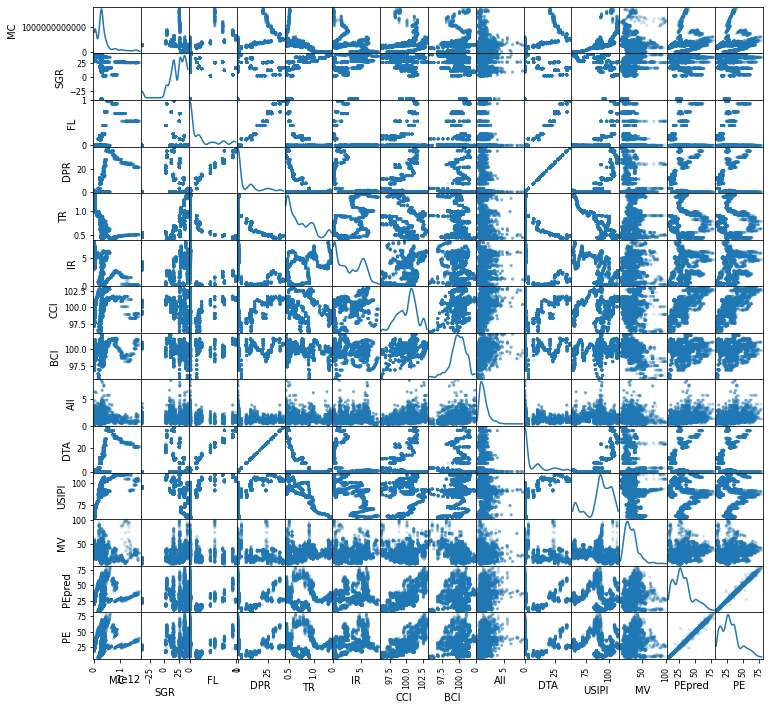

In [9]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,
               # размер картинки
               figsize=(12, 12),
               # плотность вместо гистограммы на диагонали
               diagonal='kde',
               # степень прозрачности точек
               alpha=0.2,
              );

In [26]:
DateForModel1 = df.drop(['FL',  'BCI', 'USIPI', 'PEpred'], axis=1)
DateForModel1['MC'] = DateForModel1['MC'] / 1000000000
DateForModel1

,MC,SGR,DPR,TR,IR,CCI,AII,DTA,MV,PE
0,1678.000,26.42,19.90,0.5197,0.10,99.06705,1.719510,19.90,15.85,33.15
1,1676.000,26.42,21.11,0.5075,0.12,99.06705,1.981134,21.11,16.36,35.81
2,1695.000,26.42,21.11,0.5075,0.11,99.06705,1.981134,21.11,15.98,36.21
3,1701.000,26.42,21.11,0.5075,0.11,99.06705,1.981134,21.11,15.94,36.34
4,1684.000,26.42,21.11,0.5075,0.10,99.06705,1.981134,21.11,15.86,35.99
...,...,...,...,...,...,...,...,...,...,...
7683,8.320,37.72,0.59,1.2940,8.14,99.72487,0.736842,0.59,31.61,25.43
7684,8.207,37.72,0.59,1.2940,8.02,99.72487,0.815789,0.59,36.19,25.09
7685,8.178,37.72,0.59,1.2940,8.01,99.72487,0.815789,0.59,36.52,25.00
7686,8.377,37.72,0.59,1.2940,8.06,99.72487,0.815789,0.59,36.62,25.61


In [13]:
def ln(x):
    if x!=0:
        return math.log10(x)
    else:
        return x

In [27]:
DateForModel1['PE']=DateForModel1['PE'].apply(lambda x: ln(x))
# DateForModel1['PEpred']=DateForModel1['PEpred'].apply(lambda ln: m(x))
DateForModel1['DPR']=DateForModel1['DPR'].apply(lambda x: ln(x))

DateForModel1

,MC,SGR,DPR,TR,IR,CCI,AII,DTA,MV,PE
0,1678.000,26.42,1.298853,0.5197,0.10,99.06705,1.719510,19.90,15.85,1.520484
1,1676.000,26.42,1.324488,0.5075,0.12,99.06705,1.981134,21.11,16.36,1.554004
2,1695.000,26.42,1.324488,0.5075,0.11,99.06705,1.981134,21.11,15.98,1.558829
3,1701.000,26.42,1.324488,0.5075,0.11,99.06705,1.981134,21.11,15.94,1.560385
4,1684.000,26.42,1.324488,0.5075,0.10,99.06705,1.981134,21.11,15.86,1.556182
...,...,...,...,...,...,...,...,...,...,...
7683,8.320,37.72,-0.229148,1.2940,8.14,99.72487,0.736842,0.59,31.61,1.405346
7684,8.207,37.72,-0.229148,1.2940,8.02,99.72487,0.815789,0.59,36.19,1.399501
7685,8.178,37.72,-0.229148,1.2940,8.01,99.72487,0.815789,0.59,36.52,1.397940
7686,8.377,37.72,-0.229148,1.2940,8.06,99.72487,0.815789,0.59,36.62,1.408410


In [28]:
from sklearn.utils import shuffle
DateForModel1 = shuffle(DateForModel1)
DateForModel1

,MC,SGR,DPR,TR,IR,CCI,AII,DTA,MV,PE
5360,476.23,35.99,0.000000,0.6575,5.25,102.45510,1.480000,0.00,35.14,1.814447
2200,264.77,17.16,1.005181,0.6687,0.19,98.70004,1.373137,10.12,15.53,1.060698
2430,217.82,34.81,1.077368,0.7547,0.17,97.96375,1.112645,11.95,17.51,1.012415
4216,279.67,9.22,0.000000,0.4278,1.34,100.94810,2.461847,0.00,19.00,1.607991
6427,53.37,29.70,0.000000,0.9848,5.56,100.77280,1.548387,0.00,30.02,1.586700
...,...,...,...,...,...,...,...,...,...,...
5542,357.18,35.07,0.000000,0.8189,4.69,102.00320,1.062500,0.00,45.40,1.847388
6663,28.32,29.80,0.000000,1.0270,5.30,100.49460,0.714286,0.00,33.10,1.425860
2583,210.76,33.08,0.838849,0.7572,0.27,97.57633,1.770472,6.90,21.79,1.067071
5708,222.99,35.07,0.000000,0.9042,5.49,102.76870,1.818182,0.00,33.13,1.758003


In [29]:
Y = DateForModel1['PE']
X = DateForModel1.drop('PE', axis=1)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [31]:
print('R^2: {0}'.format(model.score(X, Y)))

R^2: 0.7821226310053568


In [32]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] +  model.coef_.tolist()),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef
regression_coef(model, X, Y)

# значимо, если меньше 0.05

,predictor,coef,pvalue
0,intercept,-8.017319,0.000000e+00
1,MC,0.000235,0.000000e+00
2,SGR,-0.000259,1.399388e-02
3,DPR,-0.375040,0.000000e+00
4,TR,0.167467,0.000000e+00
5,IR,-0.018409,0.000000e+00
6,CCI,0.093186,0.000000e+00
7,AII,0.009879,8.174350e-12
8,DTA,0.012802,0.000000e+00
9,MV,0.001927,0.000000e+00
